In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import math
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

GenFR2021 = pd.read_csv(r"C:\Users\anton_zpf58tt\OneDrive\Documents\Glasgow\Year 4\ENG4110P Individual Project 4\Code\UK-Electricity-Pricing-Solutions\Generation_FR_20210101-20211231.csv")

GenFR2021 = GenFR2021.replace('n/e', np.NaN)
GenFR2021 = GenFR2021.replace('N/A', np.NaN)

GenFR2021.iloc[:,11:13] = GenFR2021.iloc[:,11:13].replace(np.NaN, 0)

GenFR2021 = pd.DataFrame({'Date': GenFR2021.iloc[:,1],
                          'Nuclear [MWh]': GenFR2021.iloc[:,16],
                          'Biomass [MWh]': GenFR2021.iloc[:,2] + GenFR2021.iloc[:,20],
                          'Gas [MWh]': GenFR2021.iloc[:,5],
                          'Coal [MWh]': GenFR2021.iloc[:,6],
                          'Oil [MWh]': GenFR2021.iloc[:,7],
                          'PSH [MWh]': GenFR2021.iloc[:,11] - GenFR2021.iloc[:,12],
                          'Hydro [MWh]': GenFR2021.iloc[:,13] + GenFR2021.iloc[:,14],
                          'Solar [MWh]': GenFR2021.iloc[:,19],
                          'Wind [MWh]': GenFR2021.iloc[:,22]})

for i in range(1,10):
    GenFR2021.iloc[71,i] = np.nanmean(GenFR2021.iloc[70:73,i]).round(1)

print(GenFR2021.to_string())

                                                Date  Nuclear [MWh]  Biomass [MWh]  Gas [MWh]  Coal [MWh]  Oil [MWh]  PSH [MWh]  Hydro [MWh]  Solar [MWh]  Wind [MWh]
0     01.01.2021 00:00 - 01.01.2021 01:00 (CET/CEST)        50378.0          612.0     5292.0         9.0      198.0      630.0       5951.0          0.0      1082.0
1     01.01.2021 01:00 - 01.01.2021 02:00 (CET/CEST)        49465.0          616.0     4265.0         9.0      207.0      574.0       5624.0          0.0      1075.0
2     01.01.2021 02:00 - 01.01.2021 03:00 (CET/CEST)        48294.0          620.0     3876.0         9.0      206.0     -127.0       5318.0          0.0      1086.0
3     01.01.2021 03:00 - 01.01.2021 04:00 (CET/CEST)        48380.0          617.0     3610.0         9.0      207.0    -1290.0       5379.0          0.0      1149.0
4     01.01.2021 04:00 - 01.01.2021 05:00 (CET/CEST)        48560.0          615.0     3472.0         9.0      207.0    -1623.0       5212.0          0.0      1170.0
5   

In [30]:
import statistics
from itertools import islice
import numpy as np

def function():
    result = []
    for i in range(0, len(GenFR2021.iloc[:,0])):
        if i < 86:
            start = 24*i
            end = 24*(i+1)
            day = GenFR2021.iloc[start,0]
            opNu = sum(GenFR2021.iloc[start:end,1])
            opBi = sum(GenFR2021.iloc[start:end,2])
            opGa = sum(GenFR2021.iloc[start:end,3])
            opCo = sum(GenFR2021.iloc[start:end,4])
            opOi = sum(GenFR2021.iloc[start:end,5])
            opPS = sum(GenFR2021.iloc[start:end,6])
            opHy = sum(GenFR2021.iloc[start:end,7])
            opSo = sum(GenFR2021.iloc[start:end,8])
            opWi = sum(GenFR2021.iloc[start:end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
        elif i == 86: # For some reason this day does not show in the DataFrame
            start = 24*i
            skip = 2066
            end = 2088
            day = GenFR2021.iloc[start,0]
            opNu = sum(GenFR2021.iloc[start:skip,1]) + sum(GenFR2021.iloc[(skip+1):end,1])
            opBi = sum(GenFR2021.iloc[start:skip,2]) + sum(GenFR2021.iloc[(skip+1):end,2])
            opGa = sum(GenFR2021.iloc[start:skip,3]) + sum(GenFR2021.iloc[(skip+1):end,3])
            opCo = sum(GenFR2021.iloc[start:skip,4]) + sum(GenFR2021.iloc[(skip+1):end,4])
            opOi = sum(GenFR2021.iloc[start:skip,5]) + sum(GenFR2021.iloc[(skip+1):end,5])
            opPS = sum(GenFR2021.iloc[start:skip,6]) + sum(GenFR2021.iloc[(skip+1):end,6])
            opHy = sum(GenFR2021.iloc[start:skip,7]) + sum(GenFR2021.iloc[(skip+1):end,7])
            opSo = sum(GenFR2021.iloc[start:skip,8]) + sum(GenFR2021.iloc[(skip+1):end,8])
            opWi = sum(GenFR2021.iloc[start:skip,9]) + sum(GenFR2021.iloc[(skip+1):end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
        elif 87 <= i < 303:
            start = 24*i
            end = 24*(i+1)
            day = GenFR2021.iloc[start,0]
            opNu = sum(GenFR2021.iloc[start:end,1])
            opBi = sum(GenFR2021.iloc[start:end,2])
            opGa = sum(GenFR2021.iloc[start:end,3])
            opCo = sum(GenFR2021.iloc[start:end,4])
            opOi = sum(GenFR2021.iloc[start:end,5])
            opPS = sum(GenFR2021.iloc[start:end,6])
            opHy = sum(GenFR2021.iloc[start:end,7])
            opSo = sum(GenFR2021.iloc[start:end,8])
            opWi = sum(GenFR2021.iloc[start:end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
        elif i == 303:
            start = 24*i
            skip = 7274
            end = 7297
            day = GenFR2021.iloc[start,0]
            opNu = sum(GenFR2021.iloc[start:skip,1]) + sum(GenFR2021.iloc[skip+2:end,1])
            opBi = sum(GenFR2021.iloc[start:skip,2]) + sum(GenFR2021.iloc[skip+2:end,2])
            opGa = sum(GenFR2021.iloc[start:skip,3]) + sum(GenFR2021.iloc[skip+2:end,3])
            opCo = sum(GenFR2021.iloc[start:skip,4]) + sum(GenFR2021.iloc[skip+2:end,4])
            opOi = sum(GenFR2021.iloc[start:skip,5]) + sum(GenFR2021.iloc[skip+2:end,5])
            opPS = sum(GenFR2021.iloc[start:skip,6]) + sum(GenFR2021.iloc[skip+2:end,6])
            opHy = sum(GenFR2021.iloc[start:skip,7]) + sum(GenFR2021.iloc[skip+2:end,7])
            opSo = sum(GenFR2021.iloc[start:skip,8]) + sum(GenFR2021.iloc[skip+2:end,8])
            opWi = sum(GenFR2021.iloc[start:skip,9]) + sum(GenFR2021.iloc[skip+2:end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
        elif 304 <= i < 365:
            start = 24*i+1
            end = 24*(i+1)+1
            day = GenFR2021.iloc[start,0]
            opNu = sum(GenFR2021.iloc[start:end,1])
            opBi = sum(GenFR2021.iloc[start:end,2])
            opGa = sum(GenFR2021.iloc[start:end,3])
            opCo = sum(GenFR2021.iloc[start:end,4])
            opOi = sum(GenFR2021.iloc[start:end,5])
            opPS = sum(GenFR2021.iloc[start:end,6])
            opHy = sum(GenFR2021.iloc[start:end,7])
            opSo = sum(GenFR2021.iloc[start:end,8])
            opWi = sum(GenFR2021.iloc[start:end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
    df = pd.DataFrame(result, columns=['Day', 'Nuclear [MWh]', 'Biomass [MWh]', 'Gas [MWh]', 'Coal [MWh]',
                                       'Oil [MWh]', 'PSH [MWh]', 'Hydro [MWh]', 'Solar [MWh]', 'Wind [MWh]'])
    return df

FRGen2021 = function().round(2)
FRGen2021["Day"] = pd.date_range(start="1/1/2021", periods=365, freq="D")
print(FRGen2021.to_string())

           Day  Nuclear [MWh]  Biomass [MWh]  Gas [MWh]  Coal [MWh]  Oil [MWh]  PSH [MWh]  Hydro [MWh]  Solar [MWh]  Wind [MWh]
0   2021-01-01      1199568.0        14708.0   105228.0       217.0     4949.0   -18487.0     138901.0      12454.0     30926.0
1   2021-01-02      1219450.0        14841.0   135875.0       201.0     4960.0     2505.0     152591.0       9349.0     43431.0
2   2021-01-03      1213397.5        14514.0   116905.5         NaN     4952.0   -18693.0     132720.0      13018.0     43832.0
3   2021-01-04      1228815.0        14596.0   176263.0     22610.0     6450.0     5370.0     183313.0      10114.0     50208.0
4   2021-01-05      1228078.0        14730.0   193002.0     26795.0     7824.0    26147.0     219008.0       8698.0     47367.0
5   2021-01-06      1236516.0        14820.0   199464.0     37474.0     5964.0    15741.0     221145.0      12620.0     27658.0
6   2021-01-07      1240934.0        14794.0   206384.0     48542.0     6271.0    16406.0     235581.0  

In [31]:
GenFR2022 = pd.read_csv(r"C:\Users\anton_zpf58tt\OneDrive\Documents\Glasgow\Year 4\ENG4110P Individual Project 4\Code\UK-Electricity-Pricing-Solutions\Generation_FR_20220101-20221231.csv")

GenFR2022 = GenFR2022.replace('n/e', np.NaN)
GenFR2022 = GenFR2022.replace('N/A', np.NaN)

GenFR2022.iloc[:,11:13] = GenFR2022.iloc[:,11:13].replace(np.NaN, 0)

GenFR2022 = pd.DataFrame({'Date': GenFR2022.iloc[:,1],
                          'Nuclear [MWh]': GenFR2022.iloc[:,16],
                          'Biomass [MWh]': GenFR2022.iloc[:,2] + GenFR2022.iloc[:,20],
                          'Gas [MWh]': GenFR2022.iloc[:,5],
                          'Coal [MWh]': GenFR2022.iloc[:,6],
                          'Oil [MWh]': GenFR2022.iloc[:,7],
                          'PSH [MWh]': GenFR2022.iloc[:,11] - GenFR2022.iloc[:,12],
                          'Hydro [MWh]': GenFR2022.iloc[:,13] + GenFR2022.iloc[:,14],
                          'Solar [MWh]': GenFR2022.iloc[:,19],
                          'Wind [MWh]': GenFR2022.iloc[:,22]})

#GenFR2022.iloc[289,1] = (GenFR2022.iloc[288,1] + GenFR2022.iloc[290,1])/2
#GenFR2022.iloc[3637,1] = (GenFR2022.iloc[3636,1] + GenFR2022.iloc[3638,1])/2

GenFR2022.iloc[5265,1] = np.nanmean(GenFR2022.iloc[5264:5267,1])

print(GenFR2022.to_string())

                                                Date  Nuclear [MWh]  Biomass [MWh]  Gas [MWh]  Coal [MWh]  Oil [MWh]  PSH [MWh]  Hydro [MWh]  Solar [MWh]  Wind [MWh]
0     01.01.2022 00:00 - 01.01.2022 01:00 (CET/CEST)        39523.0          635.0     2642.0        28.0      203.0     1077.0       8053.0          0.0      3153.0
1     01.01.2022 01:00 - 01.01.2022 02:00 (CET/CEST)        38466.0          647.0     2609.0        28.0      211.0      914.0       7671.0          0.0      3177.0
2     01.01.2022 02:00 - 01.01.2022 03:00 (CET/CEST)        37836.0          644.0     2502.0        29.0      212.0     -183.0       6930.0          0.0      3050.0
3     01.01.2022 03:00 - 01.01.2022 04:00 (CET/CEST)        36816.0          642.0     2506.0        28.0      214.0    -1845.0       6039.0          0.0      3133.0
4     01.01.2022 04:00 - 01.01.2022 05:00 (CET/CEST)        36359.0          636.0     2509.0        29.0      215.0    -2844.0       5991.0          0.0      3403.0
5   

In [32]:
import statistics
from itertools import islice
import numpy as np

def function():
    result = []
    for i in range(0, len(GenFR2022.iloc[:,0])):
        if i < 85:
            start = 24*i
            end = 24*(i+1)
            day = GenFR2022.iloc[start,0]
            opNu = sum(GenFR2022.iloc[start:end,1])
            opBi = sum(GenFR2022.iloc[start:end,2])
            opGa = sum(GenFR2022.iloc[start:end,3])
            opCo = sum(GenFR2022.iloc[start:end,4])
            opOi = sum(GenFR2022.iloc[start:end,5])
            opPS = sum(GenFR2022.iloc[start:end,6])
            opHy = sum(GenFR2022.iloc[start:end,7])
            opSo = sum(GenFR2022.iloc[start:end,8])
            opWi = sum(GenFR2022.iloc[start:end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
        elif i == 85: # For some reason this day does not show in the DataFrame
            start = 24*i
            skip = 2042
            end = 2064
            day = GenFR2022.iloc[start,0]
            opNu = sum(GenFR2022.iloc[start:skip,1]) + sum(GenFR2022.iloc[skip+1:end,1])
            opBi = sum(GenFR2022.iloc[start:skip,2]) + sum(GenFR2022.iloc[skip+1:end,2])
            opGa = sum(GenFR2022.iloc[start:skip,3]) + sum(GenFR2022.iloc[skip+1:end,3])
            opCo = sum(GenFR2022.iloc[start:skip,4]) + sum(GenFR2022.iloc[skip+1:end,4])
            opOi = sum(GenFR2022.iloc[start:skip,5]) + sum(GenFR2022.iloc[skip+1:end,5])
            opPS = sum(GenFR2022.iloc[start:skip,6]) + sum(GenFR2022.iloc[skip+1:end,6])
            opHy = sum(GenFR2022.iloc[start:skip,7]) + sum(GenFR2022.iloc[skip+1:end,7])
            opSo = sum(GenFR2022.iloc[start:skip,8]) + sum(GenFR2022.iloc[skip+1:end,8])
            opWi = sum(GenFR2022.iloc[start:skip,9]) + sum(GenFR2022.iloc[skip+1:end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
        elif 86 <= i < 302:
            start = 24*i
            end = 24*(i+1)
            day = GenFR2022.iloc[start,0]
            opNu = sum(GenFR2022.iloc[start:end,1])
            opBi = sum(GenFR2022.iloc[start:end,2])
            opGa = sum(GenFR2022.iloc[start:end,3])
            opCo = sum(GenFR2022.iloc[start:end,4])
            opOi = sum(GenFR2022.iloc[start:end,5])
            opPS = sum(GenFR2022.iloc[start:end,6])
            opHy = sum(GenFR2022.iloc[start:end,7])
            opSo = sum(GenFR2022.iloc[start:end,8])
            opWi = sum(GenFR2022.iloc[start:end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
        elif i == 302:
            start = 24*i
            skip = 7250
            end = 7273
            day = GenFR2022.iloc[start,0]
            opNu = sum(GenFR2022.iloc[start:skip,1]) + sum(GenFR2022.iloc[skip+1:end,1])
            opBi = sum(GenFR2022.iloc[start:skip,2]) + sum(GenFR2022.iloc[skip+1:end,2])
            opGa = sum(GenFR2022.iloc[start:skip,3]) + sum(GenFR2022.iloc[skip+1:end,3])
            opCo = sum(GenFR2022.iloc[start:skip,4]) + sum(GenFR2022.iloc[skip+1:end,4])
            opOi = sum(GenFR2022.iloc[start:skip,5]) + sum(GenFR2022.iloc[skip+1:end,5])
            opPS = sum(GenFR2022.iloc[start:skip,6]) + sum(GenFR2022.iloc[skip+1:end,6])
            opHy = sum(GenFR2022.iloc[start:skip,7]) + sum(GenFR2022.iloc[skip+1:end,7])
            opSo = sum(GenFR2022.iloc[start:skip,8]) + sum(GenFR2022.iloc[skip+1:end,8])
            opWi = sum(GenFR2022.iloc[start:skip,9]) + sum(GenFR2022.iloc[skip+1:end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
        elif 303 <= i < 365:
            start = 24*i+1
            end = 24*(i+1)+1
            day = GenFR2022.iloc[start,0]
            opNu = sum(GenFR2022.iloc[start:end,1])
            opBi = sum(GenFR2022.iloc[start:end,2])
            opGa = sum(GenFR2022.iloc[start:end,3])
            opCo = sum(GenFR2022.iloc[start:end,4])
            opOi = sum(GenFR2022.iloc[start:end,5])
            opPS = sum(GenFR2022.iloc[start:end,6])
            opHy = sum(GenFR2022.iloc[start:end,7])
            opSo = sum(GenFR2022.iloc[start:end,8])
            opWi = sum(GenFR2022.iloc[start:end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
    df = pd.DataFrame(result, columns=['Day', 'Nuclear [MWh]', 'Biomass [MWh]', 'Gas [MWh]', 'Coal [MWh]',
                                       'Oil [MWh]', 'PSH [MWh]', 'Hydro [MWh]', 'Solar [MWh]', 'Wind [MWh]'])
    return df

FRGen2022 = function().round(2)
FRGen2022["Day"] = pd.date_range(start="1/1/2022", periods=365, freq="D")
print(FRGen2022.to_string())

           Day  Nuclear [MWh]  Biomass [MWh]  Gas [MWh]  Coal [MWh]  Oil [MWh]  PSH [MWh]  Hydro [MWh]  Solar [MWh]  Wind [MWh]
0   2022-01-01       956188.0        14717.0    63042.0       679.0     5134.0   -17682.0     171848.0      22702.0     95301.0
1   2022-01-02       943520.0        14254.0    64895.0       688.0     5151.0   -50562.0     153507.0      14237.0    219902.0
2   2022-01-03      1004384.0        13953.0    78723.0      1081.0     5152.0    15441.0     166161.0      15969.0    201832.0
3   2022-01-04      1076214.0        13092.0   118507.0      4214.0     5153.0    -1223.0     173615.0      10356.0    156207.0
4   2022-01-05      1096611.0        13040.0   119025.0     13698.0     6520.0    -2689.0     183893.0      22108.0    126291.0
5   2022-01-06      1136062.0        13570.0   139632.0     25213.0     6411.0     2556.0     180557.0      25876.0     85168.0
6   2022-01-07      1133265.0        13953.0   134391.0     26129.0     5111.0    11194.0     190351.0  

Date             datetime64[ns]
Wind [MWh]              float64
PSH [MWh]               float64
Hydro [MWh]             float64
Nuclear [MWh]           float64
Gas [MWh]               float64
Oil [MWh]               float64
Coal [MWh]              float64
Biomass [MWh]           float64
Solar [MWh]             float64
dtype: object
Choose generation type:Wind
(-17818.25, 374183.25)
Choose y limit:400000


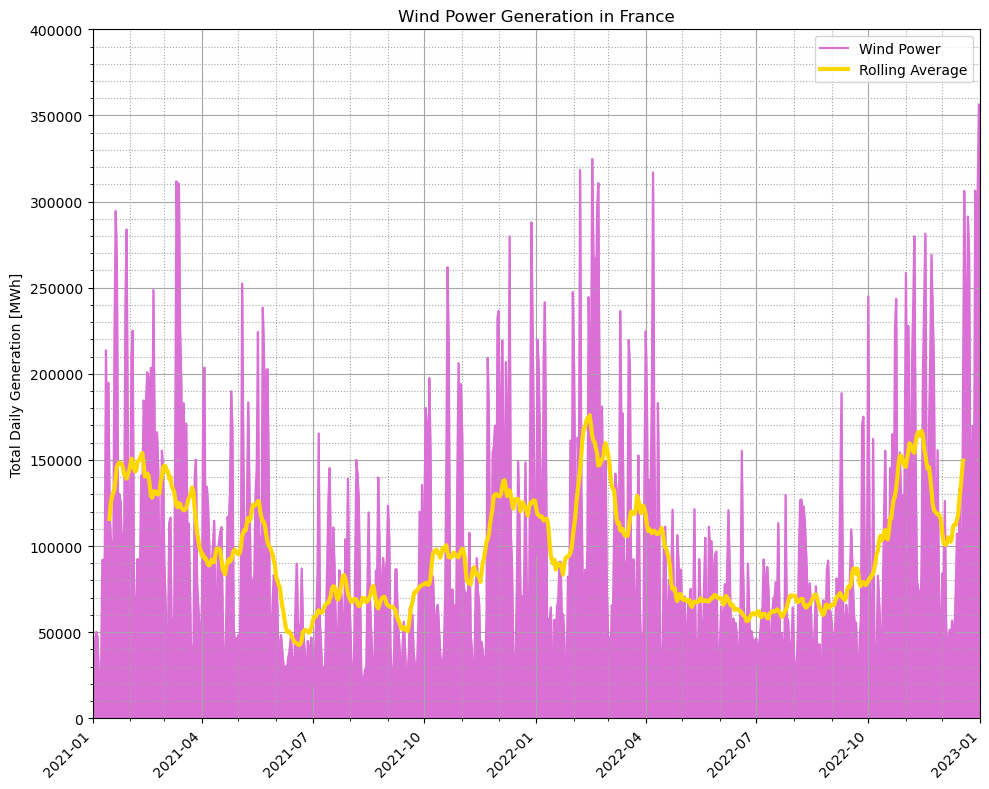

In [50]:
FRGen = pd.concat([FRGen2021["Wind [MWh]"], FRGen2022["Wind [MWh]"]], ignore_index=True).to_frame("Wind [MWh]")
FRGen["PSH [MWh]"] = pd.concat([FRGen2021["PSH [MWh]"], FRGen2022["PSH [MWh]"]], ignore_index=True).to_frame("PSH [MWh]")
FRGen["Hydro [MWh]"] = pd.concat([FRGen2021["Hydro [MWh]"], FRGen2022["Hydro [MWh]"]], ignore_index=True).to_frame("Hydro [MWh]")
FRGen["Nuclear [MWh]"] = pd.concat([FRGen2021["Nuclear [MWh]"], FRGen2022["Nuclear [MWh]"]], ignore_index=True).to_frame("Nuclear [MWh]")
FRGen["Gas [MWh]"] = pd.concat([FRGen2021["Gas [MWh]"], FRGen2022["Gas [MWh]"]], ignore_index=True).to_frame("Gas [MWh]")
FRGen["Oil [MWh]"] = pd.concat([FRGen2021["Oil [MWh]"], FRGen2022["Oil [MWh]"]], ignore_index=True).to_frame("Oil [MWh]")
FRGen["Coal [MWh]"] = pd.concat([FRGen2021["Coal [MWh]"], FRGen2022["Coal [MWh]"]], ignore_index=True).to_frame("Coal [MWh]")
FRGen["Biomass [MWh]"] = pd.concat([FRGen2021["Biomass [MWh]"], FRGen2022["Biomass [MWh]"]], ignore_index=True).to_frame("Biomass [MWh]")
FRGen["Solar [MWh]"] = pd.concat([FRGen2021["Biomass [MWh]"], FRGen2022["Biomass [MWh]"]], ignore_index=True).to_frame("Biomass [MWh]")

FRGen["Date"] = pd.date_range(start="1/1/2021", periods=730, freq="D")

NewOrder = ["Date", "Wind [MWh]", "PSH [MWh]", "Hydro [MWh]", "Nuclear [MWh]",
            "Gas [MWh]", "Oil [MWh]", "Coal [MWh]", "Biomass [MWh]", "Solar [MWh]"]

#FRGen["Wind [MWh]"] = pd.to_numeric(FRGen["Wind [MWh]"], errors='coerce')
FRGen = pd.DataFrame(FRGen)

#FRGen["BZN|FR"] = FRGen["BZN|FR"].round(2)

FRGen = FRGen.reindex(columns=NewOrder)

print(FRGen.dtypes)


######################################################################################################################

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)

a = input("Choose generation type:", )

plt.title(f"{a} Power Generation in France")
plt.ylabel('Total Daily Generation [MWh]')

ax.plot(FRGen["Date"], FRGen[f"{a} [MWh]"], color="orchid", label=f"{a} Power")
ax.plot(FRGen["Date"], FRGen[f"{a} [MWh]"].rolling(28,  center=True).mean(), linewidth = 3, color = "gold", label="Rolling Average")
plt.fill_between(FRGen["Date"], FRGen[f"{a} [MWh]"], color="orchid")

plt.legend()
plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

fig.autofmt_xdate()

print(ax.get_ylim())
b = input("Choose y limit:", )

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlim(18628, 19358)
plt.ylim(0,int(b))
plt.tight_layout()

ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter(""))

plt.show()

[-1.79419507e-06  6.54782122e+00]
6.5478212179963


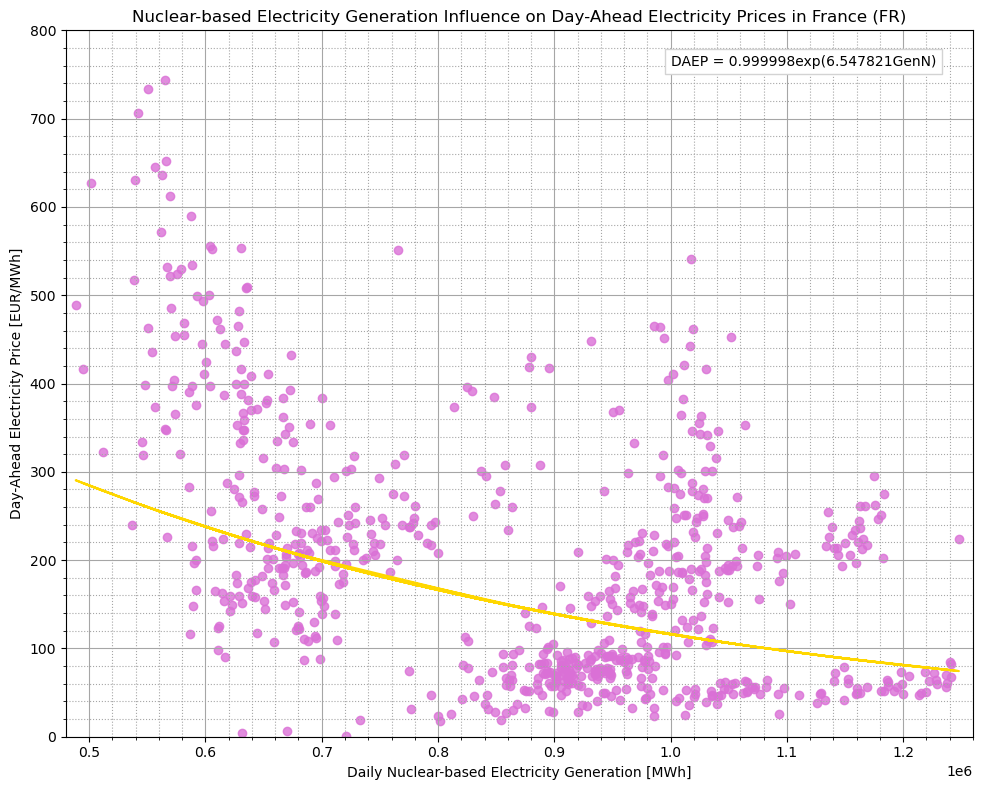

In [34]:
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
import scipy
import math

%store -r BZFR

FRGen["FR Electricity DA [EUR/MWh]"] = BZFR["BZN|FR"]

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)

sns.regplot(x=FRGen["Nuclear [MWh]"].astype(float), 
            y=FRGen["FR Electricity DA [EUR/MWh]"].astype(float), 
            scatter = True, ci = 100, fit_reg = False,
            scatter_kws = {"color": "orchid"})

#slope, intercept, r, FRGen, sterr = scipy.stats.linregress(x=FRGen["Nuclear [MWh]"].astype(float),
#                                                       y=FRGen["FR Electricity DA [EUR/MWh]"].astype(float))

def format_e(n):
    a = '%E' % n
    return a.split('E')[0].rstrip('0').rstrip('.') + 'E' + a.split('E')[1]

x_data = np.array(FRGen["Nuclear [MWh]"])
y_data = np.array(FRGen["FR Electricity DA [EUR/MWh]"])

log_y_data = np.log(y_data)

curve_fit = np.polyfit(x_data, log_y_data, 1)
print(curve_fit)
print(curve_fit[1])

ycurve = np.exp(curve_fit[1])*np.exp(curve_fit[0]*x_data)

plt.plot(x_data, ycurve, color="gold")

A = round(math.e**curve_fit[0], 6)
B = round(curve_fit[1], 6)

plt.text(1000000, 760, 'DAEP = ' + str(A) + 'exp(' + str(B) + 'GenN)',
                 bbox=dict(facecolor='white', edgecolor='lightgrey'))

#plt.legend()
plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

plt.title('Nuclear-based Electricity Generation Influence on Day-Ahead Electricity Prices in France (FR)')
plt.xlabel('Daily Nuclear-based Electricity Generation [MWh]')
plt.ylabel('Day-Ahead Electricity Price [EUR/MWh]')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

#fig.autofmt_xdate()

#plt.tick_params(axis='x', which='major', labelsize=10)
#plt.xticks(rotation=45, ha='right')
plt.xlim(480000, 1260000)
plt.ylim(0, 800)
plt.tight_layout()

#ax.xaxis.set_minor_locator(mdates.MonthLocator())
#ax.xaxis.set_minor_formatter(mdates.DateFormatter(""))

plt.show()

In [35]:
from scipy.stats import spearmanr

rhoFRN_BZNFR, pFRN_BZNFR = spearmanr(x_data, y_data)

print("rho:", rhoFRN_BZNFR)
print("p:", pFRN_BZNFR)

rho: -0.39820892831329147
p: 3.749694349389308e-29


In [36]:
%store rhoFRN_BZNFR
%store pFRN_BZNFR
%store FRGen

Stored 'rhoFRN_BZNFR' (float64)
Stored 'pFRN_BZNFR' (float64)
Stored 'FRGen' (DataFrame)
